## Importok
#### %matplotlib inline: megjeleníti a diagramokat/ábrákat (enélkül talán kisablakban felugrik, de az nem biztos)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

###Fájlok beolvasása

In [2]:
boltok = pd.read_excel("Boltok.xlsx", encoding = "utf-8") #Boltok
cikk = pd.read_excel("Cikk.xlsx", encoding = "utf-8") #Cikkek
cikkcsop = pd.read_excel("Cikk_cikkcsop.xlsx", encoding = "utf-8") #Cikk_cikkcsoportok
cikkcsoportok = pd.read_excel("Cikkcsoportok.xlsx", encoding = "utf-8") #Cikkcsoportok
geo = pd.read_excel("Geo adatok.xlsx", encoding = "utf-8") #Geomadatok
keszlet = pd.read_excel("keszlet.xlsx", encoding = "utf-8") #Keszlet
gyarto = pd.read_excel("Gyartok.xlsx", encoding = "utf-8") #Gyartok
forgalom = pd.read_excel("forgalom.xlsx", encoding = "utf-8") #Forgalom

### Hány darab bolt van?

In [3]:
len(boltok)

33

In [4]:
boltok

,sek_id,sek_desc,sek_cim
0,10200,Cég 0. Raktár1,5600
1,10300,Cég 0. Raktár2,5600
2,30103,Cég I. Bolt1,5500
3,30104,Cég I. Bolt2,5510
4,30105,Cég I. Bolt3,5516
5,30106,Cég I. Bolt4,5520
6,30108,Cég I. Bolt5,5525
7,30109,Cég I. Bolt6,5525
8,30110,Cég I. Bolt7,5526
9,30111,Cég I. Bolt8,5510


In [5]:
cikk.head(10)

,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000001,Termék 0000001,304205600,DB,50136,A
1,1000002,Termék 0000002,303781200,DB,50136,A
2,1000003,Termék 0000003,1517109000,DB,50260,A
3,1000004,Termék 0000004,403905300,DB,50258,A
4,1000008,Termék 0000005,2202901010,DB,50232,A
5,1000009,Termék 0000006,2202901000,DB,50232,A
6,1000010,Termék 0000007,2202901000,DB,50232,A
7,1000011,Termék 0000008,406,DB,53218,A
8,1000013,Termék 0000009,406,DB,53218,A
9,1000014,Termék 0000010,401301100,DB,53218,A


In [6]:
cikkcsop.head(10)

,ccsop_id4,cik_id
0,3303,1000001
1,3303,1000002
2,3206,1000003
3,3204,1000004
4,219,1000005
5,219,1000006
6,3204,1000007
7,3508,1000008
8,3203,1000009
9,3203,1000010


In [7]:
cikkcsoportok.tail(10)
#len(cikkcsoportok)

,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_id4,ccsop_desc4
299,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8402,"ALSÓRUHÁZAT, FEHÉRNEM?"
300,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8403,"ZOKNI ,HARISNYA"
301,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8406,EGYÉB RUHÁZATI KIEGÉSZÍT?K
302,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,85,"SPORT, JÁTÉK, SZABADIDŐ",8501,"SPORT, JÁTÉK, SZABADIDŐ"
303,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8601,"VIRÁGMAGOK, VIRÁGOK"
304,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8602,VIRÁGFÖLD
305,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8603,KERTÉSZETI CIKKEK
306,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,91,SZOLGÁLTATÁSOK,9101,SZOLGÁLTATÁSOK
307,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9201,TAPADÓ GÖNYGYÖLEG
308,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9202,NEM TAPADÓ GÖNYGYÖLEG


In [138]:
geo[(geo["geo_orszag"] == "Magyarország".decode('utf-8')) &(geo["geo_megye"] == "Bekes megye".decode('utf-8'))]

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
1590,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1591,5501,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1592,5502,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1593,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
1594,5515,NaN,Ecsegfalva,Bekes megye,Dél-Alföld,Magyarország
1595,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
1596,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
1597,5521,NaN,Töltse Ki,Bekes megye,Dél-Alföld,Magyarország
1598,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország
1599,5526,NaN,Kertészsziget,Bekes megye,Dél-Alföld,Magyarország


In [10]:
keszlet.head(10)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,14
1,1000004,30302,2016-02-02,0
2,1000008,30302,2016-02-02,4
3,1000011,30302,2016-02-02,7
4,1000013,30302,2016-02-02,12
5,1000015,30302,2016-02-02,0
6,1000019,30302,2016-02-02,1
7,1000020,30302,2016-02-02,13
8,1000022,30302,2016-02-02,0
9,1000024,30302,2016-02-02,5


In [11]:
keszlet_reszlet = keszlet[(keszlet["tph"] == 30313) & (keszlet["datum"] == "2016-02-02") & (keszlet["cik"] < 1000022)]

In [12]:
keszlet_reszlet
result = pd.merge(keszlet_reszlet, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
result2 = pd.merge(result,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30313,2016-02-02,21,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000001,30313,2016-02-02,20,3303,1000001,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000011,30313,2016-02-02,1,3103,1000011,1,Alap cikkcsoport,30,FRISSÁRU,301,SAJT TERMÉKEK,SAJTOK EGALIZÁLT
3,1000013,30313,2016-02-02,-1,3103,1000013,1,Alap cikkcsoport,30,FRISSÁRU,301,SAJT TERMÉKEK,SAJTOK EGALIZÁLT
4,1000019,30313,2016-02-02,0,3206,1000019,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","VAJ, MARGARIN"
5,1000003,30313,2016-02-02,0,3206,1000003,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","VAJ, MARGARIN"
6,1000020,30313,2016-02-02,10,3204,1000020,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJFÖL,KEFIR, NATUR JOGHURT"
7,1000021,30313,2016-02-02,1,3204,1000021,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJFÖL,KEFIR, NATUR JOGHURT"
8,1000009,30313,2016-02-02,1,3203,1000009,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJITALOK, KAKAÓK"
9,1000010,30313,2016-02-02,0,3203,1000010,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJITALOK, KAKAÓK"


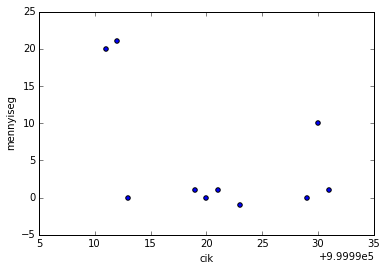

In [13]:
keszlet_reszlet.plot(kind='scatter',x="cik",y="mennyiseg")

#Feladatok

## Vegyük ki a geo adathalmazból a nem magyarországi adatokat!

In [238]:
geo[geo["geo_orszag"] == "Magyarország".decode('utf-8')]

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,0,NaN,Töltse Ki,Nem besorolt,Nem besorolt,Magyarország
3,1000,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
4,1001,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
5,1010,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
6,1011,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
7,1012,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
8,1013,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
9,1014,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
10,1015,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
11,1016,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország


##Nézzük meg, milyen területű készleteink vannak (hol vannak a boltok)!
###(félek hogy csak Békés megyeiek lesznek :( ) - igen


In [15]:
res=pd.merge(boltok, keszlet, left_on='sek_id', right_on='tph', how='inner')         
res2=pd.merge(res, geo, left_on='sek_cim', right_on='geo_id', how='inner')
res2

,sek_id,sek_desc,sek_cim,cik,tph,datum,mennyiseg,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,30103,Cég I. Bolt1,5500,1000002,30103,2016-02-02,21.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1,30103,Cég I. Bolt1,5500,1000004,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,1000008,30103,2016-02-02,7.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30103,Cég I. Bolt1,5500,1000011,30103,2016-02-02,0.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30103,Cég I. Bolt1,5500,1000013,30103,2016-02-02,-1.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
5,30103,Cég I. Bolt1,5500,1000019,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
6,30103,Cég I. Bolt1,5500,1000020,30103,2016-02-02,32.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
7,30103,Cég I. Bolt1,5500,1000022,30103,2016-02-02,7.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
8,30103,Cég I. Bolt1,5500,1000024,30103,2016-02-02,4.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
9,30103,Cég I. Bolt1,5500,1000026,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország


## Csináljunk egy táblázatot, amelyben megnézzük hogy mely terméket ki gyártotta! (Ehhez még be kell olvasni a gyártó táblát is).

In [175]:
gyarto.head()

,gyarto_id,gyarto_desc
0,50146,Gyártó 1
1,52600,Gyártó 2
2,52612,Gyártó 3
3,53022,Gyártó 4
4,53050,Gyártó 5


In [17]:
result = pd.merge(cikk, cikkcsop, left_on='cik_id', right_on='cik_id', how='inner')
result.drop('cjel_id', axis=1, inplace=True)
result.drop('cik_me_id', axis=1, inplace=True)
result.drop('vtsz_id', axis=1, inplace=True)
result

,cik_id,cik_desc2,cik_gyart,ccsop_id4
0,1000001,Termék 0000001,50136,3303
1,1000002,Termék 0000002,50136,3303
2,1000003,Termék 0000003,50260,3206
3,1000004,Termék 0000004,50258,3204
4,1000008,Termék 0000005,50232,3508
5,1000009,Termék 0000006,50232,3203
6,1000010,Termék 0000007,50232,3203
7,1000011,Termék 0000008,53218,3103
8,1000013,Termék 0000009,53218,3103
9,1000014,Termék 0000010,53218,3211


In [18]:
result2 = pd.merge(result, cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2.drop('ccsop_id4', axis=1, inplace=True)
result2.drop('ccsop_id', axis=1, inplace=True)
result2.drop('ccsop_id2', axis=1, inplace=True)
result2.drop('ccsop_id3', axis=1, inplace=True)
result2

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000319,Termék 0000269,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000584,Termék 0000468,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000586,Termék 0000470,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1001115,Termék 0000872,52490,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1015395,Termék 0010272,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1015397,Termék 0010273,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1015398,Termék 0010274,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [282]:
result3 = pd.merge(result2, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result3.drop('gyarto_id',axis=1, inplace=True)
result3

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


In [20]:
result3["gyarto_desc"].tolist()[0] == "Gyártó 93".decode("utf-8")

True

In [21]:
a = list(set(result3["gyarto_desc"].tolist()))
a[0] == "Gyártó 818".decode("utf-8")

True

## Listázd ki milyen termékeink vannak (ccsop_desc4)! Mindegyik csak egyszer szerepeljen!

In [243]:
csop=list(set(cikkcsoportok["ccsop_desc4"].tolist()))
a = pd.DataFrame(csop)
a

,0
0,KIS KISZERELÉS?
1,"PEZSG?TABLETTÁK, ITALPOROK"
2,CSIRKE CSOMAGOLT
3,NAPOZÓSZEREK
4,SÓ ZACSKÓS
5,PÁLINKÁK
6,"LEKVÁROK , DZSEMEK"
7,ZÖLDSÉG EGYÉB
8,SERTÉS CSOMAGOLT
9,"IZZÓK, FÉNYCSÖVEK"


#>>>>>>>>>>>>>>>>>DIagram feladatok:<<<<<<<<<<<<<<<<<<<<<<<
##Legyen meg a táblázat is, ami alapján készül a diagram és ne random helyről illetve tábla megjelenítése nélkül csináljuk meg az ábrát!

## Készítsünk diagramot, hogy egy adott napon, adott boltnak milyen termékből mennyi készlete volt!
### előtte ugye össze kell mergelni a termékeket a készlettel, és akkor a kódsorban megadott feltétel alapján kell megcsinálni az eloszlást :) Remélhetőleg  bplot vagy pyplot vagy seaborn-nel meg tudjuk szépen csinálni, mert először nem akaródzott

In [178]:
elso = keszlet[(keszlet["tph"]==30302) & (keszlet["datum"]=="2016-02-02")]
elso.index = elso["cik"]

In [180]:
elso.drop("cik",axis=1, inplace=True)
elso.drop("tph",axis=1, inplace=True)
elso.drop("datum",axis=1, inplace=True)

In [196]:
#elso.drop("datum",axis=1, inplace=True)
#elso = elso[(elso["mennyiseg"]<1) & (elso["mennyiseg"]>-1) & (elso["mennyiseg"]!=0)]
elso = elso[(elso["mennyiseg"]>200)]
elso

,mennyiseg
cik,
1001063,344.000
1002279,216.035
1002950,217.000
1003515,242.000
1003519,321.000
1003661,251.000
1005137,243.000
1005476,539.000
1005869,2522.000


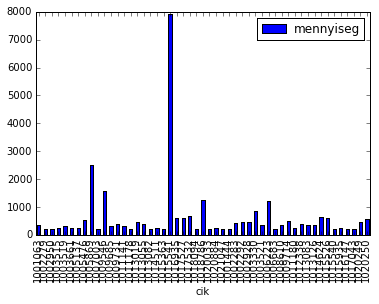

In [198]:
elso.plot(kind='bar')

## Készítsünk diagramot, hogy egy adott boltnak hogyan változik a készlete egy hét alatt!
####ha jól tudom 6napos készlet-adatunk van és nem tudom milyen diagramon lenne ezt a legszebb ábrázolni, majd kitaláljuk ;)

In [244]:
keszlet
masodik = keszlet[(keszlet["tph"]==30302) | (keszlet["tph"]==30313)]
masodik

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,14.000
1,1000004,30302,2016-02-02,0.000
2,1000008,30302,2016-02-02,4.000
3,1000011,30302,2016-02-02,7.000
4,1000013,30302,2016-02-02,12.000
5,1000015,30302,2016-02-02,0.000
6,1000019,30302,2016-02-02,1.000
7,1000020,30302,2016-02-02,13.000
8,1000022,30302,2016-02-02,0.000
9,1000024,30302,2016-02-02,5.000


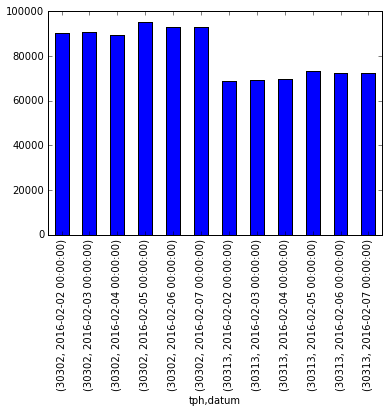

In [250]:
#masodik = masodik.groupby("datum")
#masodik = masodik.groupby(["tph","datum"])
#massum = masodik["mennyiseg"].sum()
masodik.groupby(["tph","datum"])["mennyiseg"].sum().plot(kind='bar')

In [251]:
masodik2 = keszlet.groupby(["tph","datum"])
massum = masodik2["mennyiseg"].sum()
massum

tph    datum     
30103  2016-02-02    124068.4851
       2016-02-03    133591.1621
       2016-02-04    131581.2341
       2016-02-05    129510.1944
       2016-02-06    132846.6194
       2016-02-07    132846.6194
30104  2016-02-02    269769.8616
       2016-02-03    267518.5198
       2016-02-04    258656.5755
       2016-02-05    273846.4725
       2016-02-06    265375.9479
       2016-02-07    265375.9479
30105  2016-02-02     83291.3001
       2016-02-03     80681.1551
       2016-02-04     78002.2201
       2016-02-05     79531.8308
       2016-02-06    276516.3140
       2016-02-07    276516.3140
30106  2016-02-02     50050.6170
       2016-02-03     53143.4970
       2016-02-04     52215.0310
       2016-02-05     50499.0750
       2016-02-06     50685.7450
       2016-02-07     50685.7450
30108  2016-02-02     74061.7536
       2016-02-03     82045.6637
       2016-02-04     80450.1457
       2016-02-05     79036.3095
       2016-02-06     76512.7945
       2016-02-07     765

## Diagramm: Hány terméket gyártanak az egyes gyártók?

In [166]:
#import collections
#cikkcnt=collections.Counter(cikk["cik_gyart"])
#cikkcnt.values()
#cikkcnt.keys()
result
result5 = pd.merge(result, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result5.groupby("gyarto_desc").count()

,cik_id,cik_desc2,cik_gyart,ccsop_id4,gyarto_id
gyarto_desc,,,,,
Gyártó 1,1,1,1,1,1
Gyártó 101,4,4,4,4,4
Gyártó 102,68,68,68,68,68
Gyártó 103,13,13,13,13,13
Gyártó 104,9,9,9,9,9
Gyártó 106,4,4,4,4,4
Gyártó 107,30,30,30,30,30
Gyártó 108,91,91,91,91,91
Gyártó 111,55,55,55,55,55


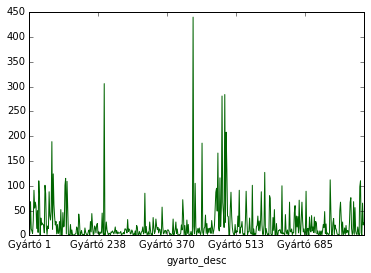

In [252]:
result5.groupby("gyarto_desc")["cik_id"].count().plot(color='DarkGreen')

In [200]:
result5.groupby("gyarto_desc").count().describe()

,cik_id,cik_desc2,cik_gyart,ccsop_id4,gyarto_id
count,487.000000,487.000000,487.000000,487.000000,487.000000
mean,23.154004,23.154004,23.154004,23.154004,23.154004
std,41.266260,41.266260,41.266260,41.266260,41.266260
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000
75%,24.500000,24.500000,24.500000,24.500000,24.500000
max,440.000000,440.000000,440.000000,440.000000,440.000000


## -Diagramm: Hány gyártó gyárt terméket egy adott boltnak(30302)?

In [257]:
tmp = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp2=tmp[tmp["tph"]==30302]
tmp2
len(set(tmp2["cik_gyart"].tolist()))

,cik,tph,datum,mennyiseg,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000002,30302,2016-02-02,14,1000002,Termék 0000002,303781200,DB,50136,A
30,1000002,30302,2016-02-03,14,1000002,Termék 0000002,303781200,DB,50136,A
60,1000002,30302,2016-02-04,14,1000002,Termék 0000002,303781200,DB,50136,A
90,1000002,30302,2016-02-05,14,1000002,Termék 0000002,303781200,DB,50136,A
120,1000002,30302,2016-02-06,14,1000002,Termék 0000002,303781200,DB,50136,A
150,1000002,30302,2016-02-07,14,1000002,Termék 0000002,303781200,DB,50136,A
180,1000004,30302,2016-02-02,0,1000004,Termék 0000004,403905300,DB,50258,A
203,1000004,30302,2016-02-03,-1,1000004,Termék 0000004,403905300,DB,50258,A
226,1000004,30302,2016-02-04,-1,1000004,Termék 0000004,403905300,DB,50258,A
249,1000004,30302,2016-02-05,5,1000004,Termék 0000004,403905300,DB,50258,A


In [259]:
tmp.drop("cik",axis=1,inplace=True)
tmp.drop("datum",axis=1,inplace=True)
tmp.drop("cik_id",axis=1,inplace=True)
tmp.drop("cik_desc2",axis=1,inplace=True)
tmp.drop("vtsz_id",axis=1,inplace=True)
tmp.drop("cik_me_id",axis=1,inplace=True)
tmp.drop("cjel_id",axis=1,inplace=True)
tmp

,tph,mennyiseg,cik_gyart
0,30302,14.000,50136
1,30313,21.000,50136
2,30316,12.000,50136
3,30318,44.000,50136
4,30319,20.000,50136
5,30323,11.000,50136
6,30324,26.000,50136
7,30325,8.000,50136
8,30327,30.000,50136
9,30329,19.000,50136


In [269]:
b = tmp.groupby(["tph","cik_gyart"]).count()
b

mennyiseg
tph   cik_gyart           
30103 0               4805
      50004            870
      50006             12
      50008            120
      50016              6
      50020              6
      50022            408
      50028            392
      50030              6
      50032             60
      50036            281
      50040            198
      50050            180
      50056              6
      50062            246
      50064            246
      50068              6
      50070            240
      50074            450
      50076             42
      50080             48
      50082            108
      50084             18
      50090            276
      50096            138
      50110             96
      50118            180
      50120             48
      50122             12
      50128            462
...                    ...
30352 53912              6
      53952              6
      53964             18
      54158            120
      54254             12
      54338             60
      54512              6
      54624             78
      54686             12
      54734             42
      54796             48
      54806            254
      54844            141
      54878             90
      54898              6
      54906             78
      54920             78
      54922              6
      54964             12
      55049            290
      55051            174
      55053             54
      55129             72
      55131             12
      55141              6
      55160             24
      55180             18
      55182              6
      55308              4
      90214              6

[9905 rows x 1 columns]

## -Diagramm: Adott termékcsoport(3303) mennyisége egy adott boltban(30302)! 

In [271]:
tmp = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp2 = pd.merge(tmp, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
tmp3=tmp2[(tmp2["tph"]==30302) & (tmp2["ccsop_id4"]==3303)]
len(tmp3)
tmp2

,cik,tph,datum,mennyiseg,cik_id_x,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id,ccsop_id4,cik_id_y
0,1000002,30302,2016-02-02,14.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
1,1000002,30313,2016-02-02,21.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
2,1000002,30316,2016-02-02,12.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
3,1000002,30318,2016-02-02,44.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
4,1000002,30319,2016-02-02,20.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
5,1000002,30323,2016-02-02,11.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
6,1000002,30324,2016-02-02,26.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
7,1000002,30325,2016-02-02,8.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
8,1000002,30327,2016-02-02,30.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
9,1000002,30329,2016-02-02,19.000,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002


In [272]:
tmp2.drop("cik_id_x",axis=1,inplace=True)
tmp2.drop("cik_id_y",axis=1,inplace=True)
tmp2.drop("cjel_id",axis=1,inplace=True)
tmp2.drop("cik_me_id",axis=1,inplace=True)
tmp2.drop("vtsz_id",axis=1,inplace=True)
tmp2.drop("cik",axis=1,inplace=True)
tmp2.drop("cik_gyart",axis=1,inplace=True)
tmp2.drop("cik_desc2",axis=1,inplace=True)
tmp2

,tph,datum,mennyiseg,ccsop_id4
0,30302,2016-02-02,14.000,3303
1,30313,2016-02-02,21.000,3303
2,30316,2016-02-02,12.000,3303
3,30318,2016-02-02,44.000,3303
4,30319,2016-02-02,20.000,3303
5,30323,2016-02-02,11.000,3303
6,30324,2016-02-02,26.000,3303
7,30325,2016-02-02,8.000,3303
8,30327,2016-02-02,30.000,3303
9,30329,2016-02-02,19.000,3303


In [277]:
e = tmp2.groupby(["tph","datum","ccsop_id4"]).sum()
e

mennyiseg
tph   ccsop_id4            
30103 0             78.0000
      18             0.0000
      111         -179.9000
      112         5989.3865
      114         -185.8050
      115         -121.3100
      122          321.7850
      124           44.1000
      141           68.9350
      142         1193.4850
      143          -38.0520
      144          146.9060
      145         -227.5000
      152          -23.0550
      154          -25.4600
      161          234.5650
      162          -42.3750
      163            1.5650
      164           40.5200
      166           72.7450
      210          239.4400
      211         1258.6530
      212          504.7000
      213          496.2260
      214         1478.1000
      215           69.0500
      216           59.3380
      217          632.2050
      218          441.3950
      219          214.3590
...                     ...
30352 7303        1117.0000
      7304         261.0000
      7305          66.0000
      7306        2575.0000
      7307        1188.0000
      7309        4309.0000
      7312          48.0000
      7317          42.0000
      7401        5147.0000
      7402         -81.0000
      7403         523.0000
      7406         300.0000
      8101        1584.0000
      8102          96.0000
      8104        1224.0000
      8108         156.0000
      8109          30.0000
      8113          42.0000
      8203          66.0000
      8204       19110.0000
      8205           0.0000
      8207         599.0000
      8208        1162.0000
      8212         792.0000
      8403        1428.0000
      8501          12.0000
      8601         348.0000
      9201       13189.0000
      9202        1361.0000
      9601       10006.0000

[7756 rows x 1 columns]

## Diagram: Hány bolt van a városokban?

In [231]:
#import collections
#cnt=collections.Counter(geo["geo_varos"])
#cnt.values()
#cnt.keys()
boltgeo=pd.merge(boltok, geo, left_on='sek_cim', right_on='geo_id', how='inner')
boltgeo

,sek_id,sek_desc,sek_cim,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,10200,Cég 0. Raktár1,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
1,10300,Cég 0. Raktár2,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30116,Cég I. Bolt10,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30104,Cég I. Bolt2,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
5,30111,Cég I. Bolt8,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
6,30105,Cég I. Bolt3,5516,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
7,30106,Cég I. Bolt4,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
8,30113,Cég I. Bolt9,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
9,30108,Cég I. Bolt5,5525,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország


In [148]:
boltgeo.drop("geo_orszag",axis=1, inplace=True)
boltgeo.drop("geo_regio",axis=1, inplace=True)
boltgeo.drop("geo_megye",axis=1, inplace=True)
boltgeo.drop("geo_kerulet",axis=1, inplace=True)
boltgeo.drop("geo_id",axis=1, inplace=True)
boltgeo.drop("sek_cim",axis=1, inplace=True)
boltgeo.drop("sek_id",axis=1, inplace=True)

In [208]:
valami = boltgeo.groupby("geo_varos")
type(boltgeo["geo_varos"].tolist())

list

In [209]:
from collections import Counter
counts = Counter(boltgeo["geo_varos"].tolist())
print(counts)

Counter({u'B\xe9k\xe9scsaba': 3, u'D\xe9vav\xe1nya': 2, u'Medgyesbodz\xe1s': 2, u'Szeghalom': 2, u'F\xfczesgyarmat': 2, u'Gyomaendr\xf6d': 2, u'Nagyb\xe1nhegyes': 1, u'K\xe9tsoprony': 1, u'Gyula': 1, u'Kert\xe9szsziget': 1, u'Kardos': 1, u'Csan\xe1dap\xe1ca': 1, u'Magyarb\xe1nhegyes': 1, u'Hunya': 1, u'B\xe9k\xe9sszentandr\xe1s': 1, u'Pusztaottlaka': 1, u'Mez\xf6ber\xe9ny': 1, u'\xdajk\xedgy\xf3s': 1, u'Kondoros': 1, u'Kamut': 1, u'\xd6rm\xe9nyk\xfat': 1, u'K\xf6r\xf6slad\xe1ny': 1, u'Telekgerend\xe1s': 1, u'Csabacsud': 1, u'Medgyesegyh\xe1za': 1, u'Murony': 1})


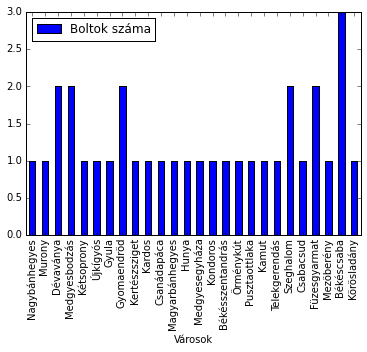

In [222]:
dictionary = dict(counts)
d = pd.DataFrame(dictionary.items())
d
d.columns = ['Városok', 'Boltok száma']
d.index=d["Városok"]
d.plot(kind='bar')

#CLUSTER:
##Hasonló boltokra vagyunk kíváncsiak (ezek lesznek az egyedi azonosítóink)
##Dimenziók: 
###ccsop_id2 (miből mennyi van az adott boltban)
###termékek száma (csinálunk egy skálát mondjuk 1-10ig a mennyiségekről, nem tudom mekkora lesz ez a szám)
###hol van a bolt (ha több féle helyünk van akkor irányítószám elsőszámjegye, ha nem akkor második vagy harmadik, nem tudom hogy működik az irányítószám) ; egyéb ötletek...

##Mennyi a legjobb klaszter-szám? (ezt sose tudtam eldönteni mi alapján, ezt is kitaláljuk valahogy)

# Egyéb ötletek amiket lehetne csinálni, hirtelen ennyi jutott eszembe, de ha bármilyen elvetemült ötleted van küldd át!

#Forgalom-rész: ezt még át kell alakítani napibontásra, meg még nem néztem bele mit tud ez a halmaz, remélhetőleg a későbbiekben össze tudjuk vetni a kettőt!

##Napi szintre alakítani a forgalom táblát! (össze kell adni az azonos napon, azonos cikkszámú, azonos boltban található termékek mennyiségét)

## Melyik terméknek volt a legnagyobb terjedelme boltokra bontva? (akár diagramm is)
### ezt foglalmam sincs még hogy

## Összehasonlítani egy termék forgalmát 2-3 boltra (diagram)!

## Keletkezik-e negatív forgalom? (Ha igen mit jelent, mi az oka?)

# Összehasonlítani a készletet és a forgalmat, van-e változás adott termék, adott boltban, adott időintervallumában a készlet változás és a forgalom között, ha van/ ha nincs megmagyarázni!!!!